In [24]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

#load data
def get_data(path):
    data = load_svmlight_file(path)
    return data[0], data[1]

#loss function
def compute_loss(X, y, w, lamda):
    loss = lamda/2*(np.linalg.norm(w,2)**2)+np.mean((y-X.dot(w.T))**2)
    return loss

#gradient value
def gradient(X, y, w, lamda):
    gw = -2*np.mean(X*(y-X.dot(w.T)),axis=0,keepdims = True)+lamda*w
    return gw

In [25]:
path = "C:/Users/47864/Desktop/Data/housing_scale.txt"
X, y = get_data(path)

loss_train_history = []
loss_valid_history = []

In [26]:
X = np.hstack([X.toarray(), np.ones((X.shape[0], 1))])
X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                      y, 
                                                      test_size = 0.3, #hoold-out
                                                      random_state = 0)
y_train = y_train.reshape(-1,1)

In [27]:
#initialize parameters
learning_rate = 0.001
num_round = 500
w = np.random.random((1,14)) #random initialization
lamda = 1

In [28]:
for item in range(num_round):
    loss_train = compute_loss(X_train, y_train, w, lamda)
    loss_train_history.append(loss_train)
    loss_valid = compute_loss(X_valid, y_valid, w, lamda)
    loss_valid_history.append(loss_valid)
    #gradient descent
    w = w - learning_rate*gradient(X_train, y_train, w, lamda)
    if item == 200: #maybe the best
        best_w = w

Best w: [[-3.18922665 -2.19946668 -0.90552238 -2.31820422 -1.33181976  1.32352814
   1.43697608 -1.63212561 -1.51424543 -0.77851404  0.43708053  3.87844836
  -1.87579209  4.58181091]]
Last w: [[-3.96943162 -2.1451874  -1.56157533 -2.53886242 -1.79547814  1.75455745
   1.03378142 -1.90895296 -1.62139888 -1.19217313 -0.19365673  4.19011121
  -2.90885475  5.04130406]]


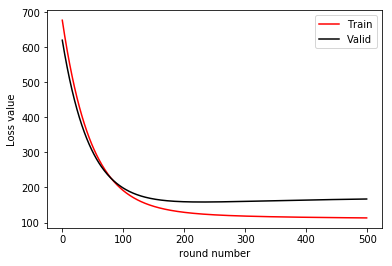

In [29]:
print("Best w:", best_w)
print("Last w:", w)
plt.plot(loss_train_history,'red',label='Train')
plt.plot(loss_valid_history,'black',label='Valid')
plt.xlabel('round number')
plt.ylabel('Loss value')
plt.legend()
plt.show()